In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [20]:
data=pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

<Axes: >

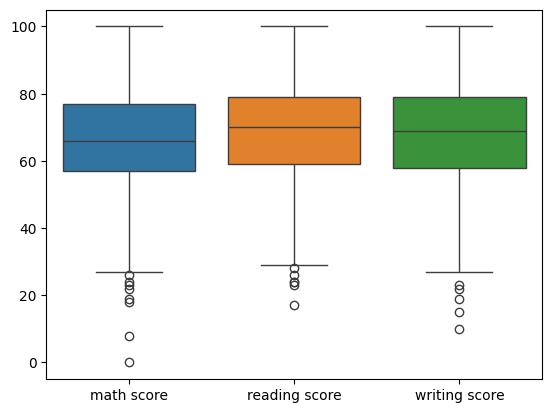

In [25]:
sns.boxplot(data)

Z-score

In [26]:
outliers=[]

def detect_outliers_zs(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)

    return outliers    


In [27]:
sample_outliers_math=detect_outliers_zs(data['math score'])
sample_outliers_reading=detect_outliers_zs(data['reading score'])
sample_outliers_writing=detect_outliers_zs(data['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(sample_outliers_writing)

[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]


IQR

In [28]:
outliers=[]

def detect_outliers_iqr(data):
    # data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)

    for i in data:
        if(i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers        

In [29]:
sample_outliers_math=detect_outliers_iqr(data['math score'])
sample_outliers_reading=detect_outliers_iqr(data['reading score'])
sample_outliers_writing=detect_outliers_iqr(data['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(sample_outliers_writing)

[18, 0, 22, 24, 26, 19, 23, 8, 17, 26, 28, 23, 24, 24, 10, 22, 19, 15, 23]
[18, 0, 22, 24, 26, 19, 23, 8, 17, 26, 28, 23, 24, 24, 10, 22, 19, 15, 23]
[18, 0, 22, 24, 26, 19, 23, 8, 17, 26, 28, 23, 24, 24, 10, 22, 19, 15, 23]


Dealing with Outliers We can replce the outliers values with the mean or median value and thus remove outliers from the dataset.


In [30]:
numeric_columns=data.select_dtypes(include=['number']).columns

skewness_before=data[numeric_columns].skew()
print("skewness before replacing outliers:")
print(skewness_before)



skewness before replacing outliers:
math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64


In [31]:
median_math=data['math score'].median()
for i in sample_outliers_math:
    data['math score'].replace(to_replace=i,value=median_math,inplace=True)


median_write=data['writing score'].median()
for i in sample_outliers_writing:
    data['writing score'].replace(to_replace=i,value=median_write,inplace=True)


median_read=data['reading score'].median()
for i in sample_outliers_reading:
    data['reading score'].replace(to_replace=i,value=median_read,inplace=True)



C:\Users\Asus\AppData\Local\Temp\ipykernel_27280\2467920294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['math score'].replace(to_replace=i,value=median_math,inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27280\2467920294.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [32]:
skewness_after=data[numeric_columns].skew()
print("skewness after replacing outliers:")
print(skewness_after)


skewness after replacing outliers:
math score      -0.058490
reading score   -0.139879
writing score   -0.153952
dtype: float64


<Axes: >

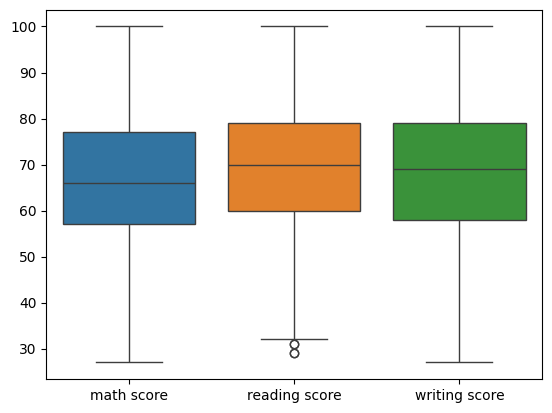

In [33]:
sns.boxplot(data)

In [34]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


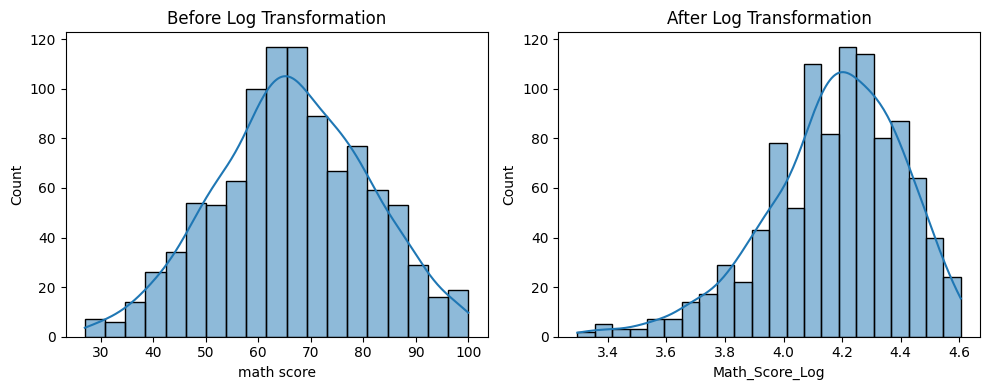

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_Score_Log
0,female,group B,bachelor's degree,standard,none,72,72,74,4.276666
1,female,group C,some college,standard,completed,69,90,88,4.234107
2,female,group B,master's degree,standard,none,90,95,93,4.499810
3,male,group A,associate's degree,free/reduced,none,47,57,44,3.850148
4,male,group C,some college,standard,none,76,78,75,4.330733


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['math score'], kde=True)
plt.title('Before Log Transformation')

# Apply log transformation
data['Math_Score_Log'] = np.log(data['math score'])

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(data['Math_Score_Log'], kde=True)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()


data.head()

In [36]:
print("\nFinal Transformed Dataset:\n", data)



Final Transformed Dataset:
      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none      